In [63]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [64]:
# Define the column names for the UNSW-NB15 dataset
column_names = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl',
    'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
    'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sinpkt',
    'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd',
    'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
    'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label'
]

#Load the datasets without headers
df1 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_1.csv', header=None, names=column_names, low_memory=False)
df2 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_2.csv', header=None, names=column_names, low_memory=False)
df3 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_3.csv', header=None, names=column_names, low_memory=False)
df4 = pd.read_csv('Datasets/UNSW-NB15/UNSW-NB15_4.csv', header=None, names=column_names, low_memory=False)

#Combine into one dataframe
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

print(df.shape)
print(df.head())

(2540047, 49)
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   
3  59.166.0.5   3593  149.171.126.5     53   udp   CON  0.001209     132   
4  59.166.0.3  49664  149.171.126.0     53   udp   CON  0.001169     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   
3     164    31  ...           0           6           9          1   
4     178    31  ...           0           7           9          1   

   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  \
0           3        

In [65]:
# Exploratory Data Analysis
print(df.info())

# Plotly visualization of the 'proto' column

proto_counts = df['proto'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Protocols (Log Scale)', log_y = True)
fig.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  sload             float64
 15  dload             float64
 16  spkts             int64  
 17  dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  sjit          

In [66]:
# Plotly visualization of the 'attack_cat' column
proto_counts = df['attack_cat'].value_counts()
fig = px.bar(x=proto_counts.index, y=proto_counts.values, title='Distribution of Attack Categories', log_y = True)
fig.show()

In [67]:
label_counts = df['label'].value_counts()
print("Traffic Distributions")
print(label_counts)
print("\n0 = Normal, 1 = Attack")

# Plotly visualization of the the Traffic Distributions 
label_df = label_counts.reset_index()

Traffic Distributions
label
0    2218764
1     321283
Name: count, dtype: int64

0 = Normal, 1 = Attack


In [68]:
#Visualization of distribution of traffic
label_df = label_counts.reset_index()
label_df['label_name'] = label_df['label'].apply(lambda x: 'Attack' if x == 1 else 'Normal')
fig = px.pie(label_df,
             values='count',
             names='label_name',
             title='Distribution of Normal vs. Attack Traffic',
             color_discrete_map={'Normal':'lightcyan',
                                 'Attack':'darkorange'})
fig.show()

In [69]:
print(f"Original shape: {df.shape}")

# Identify the categorical columns we want to encode
columns_to_encode = ['proto', 'service', 'state']
print(f"Columns to encode: {columns_to_encode}")
# Apply one-hot encoding using pandas
df = pd.get_dummies(df, columns=columns_to_encode)
# See the new shape and the new columns that were created
print(f"Shape after one-hot encoding: {df.shape}")
print("\nDataFrame columns after encoding:")
print(df.columns)

Original shape: (2540047, 49)
Columns to encode: ['proto', 'service', 'state']
Shape after one-hot encoding: (2540047, 210)

DataFrame columns after encoding:
Index(['srcip', 'sport', 'dstip', 'dsport', 'dur', 'sbytes', 'dbytes', 'sttl',
       'dttl', 'sloss',
       ...
       'state_INT', 'state_MAS', 'state_PAR', 'state_REQ', 'state_RST',
       'state_TST', 'state_TXD', 'state_URH', 'state_URN', 'state_no'],
      dtype='object', length=210)


In [124]:
# --- Finalize Feature Set & Scale Date ---
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Define columns to drop
# We remove labels ('label', 'attack_cat') and identifiers ('srcip', 'dstip').
# We also drop ports for this baseline model to keep it simple.
columns_to_drop = ['label', 'attack_cat', 'srcip', 'dstip', 'sport', 'dsport']
print("Creating the final feature set by dropping unnecessary columns...")
# Ensure we only try to drop columns that actually exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop(columns=existing_columns_to_drop)

# The 'service' column might have '-' values which are not numeric.
# Let's ensure all columns are numeric, converting non-numeric values to NaN
for col in X.columns:
   X[col] = pd.to_numeric(X[col], errors='coerce')
# Drop any rows that now have missing values after our conversion
X.dropna(inplace=True)
print(f"Shape of our final feature set: {X.shape}")
#Scale using StandardScaler
print("\nScaling the feature set...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Wrap NumPy array in a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n--- First 5 rows of the final, scaled data ---")
print(X_scaled_df.head())

Creating the final feature set by dropping unnecessary columns...
Shape of our final feature set: (1087203, 205)

Scaling the feature set...

--- First 5 rows of the final, scaled data ---
        dur    sbytes    dbytes     sttl      dttl     sloss    dloss  \
0 -0.035808 -0.126637 -0.259444 -0.14631 -0.074079 -0.388188 -0.33313   
1 -0.034128 -0.115829 -0.258655 -0.14631 -0.074079 -0.388188 -0.33313   
2 -0.035805 -0.126255 -0.259365 -0.14631 -0.074079 -0.388188 -0.33313   
3 -0.035800 -0.126637 -0.259444 -0.14631 -0.074079 -0.388188 -0.33313   
4 -0.035802 -0.126255 -0.259365 -0.14631 -0.074079 -0.388188 -0.33313   

      sload     dload     spkts  ...  state_MAS  state_PAR  state_REQ  \
0 -0.089804 -0.537738 -0.516690  ...  -0.001356  -0.001918  -0.057341   
1 -0.099666 -0.664202 -0.490032  ...  -0.001356  -0.001918  -0.057341   
2 -0.089293 -0.534532 -0.516690  ...  -0.001356  -0.001918  -0.057341   
3 -0.091327 -0.555270 -0.516690  ...  -0.001356  -0.001918  -0.057341   
4 -0.08

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd 



#print(f"Calculated contamination rate to use: {contamination_rate}")

iso_forest = IsolationForest(n_estimators=100,
                             contamination=0.04,
                             random_state=42,
                             n_jobs=-1)

print("\nTraining the Isolation Forest model... (This may take a few minutes depending on your CPU)")

predictions = iso_forest.fit_predict(X_scaled)

print("Training complete")


#Add predictions back to original DataFrame fo analysis
df['anomaly_prediction'] = 1
df.loc[X.index, 'anomaly_prediction'] = predictions

print("\n--- Model Prediction Summary ---")
prediction_counts = df['anomaly_prediction'].value_counts()
print(prediction_counts)

print(f"\nThe model predicted {prediction_counts.get(-1, 0)} anomalies.")

PCA components: 1
Best threshold (F1-calibrated): -0.26449929864995086
F1 at best threshold: 0.23371517875843847
ROC AUC: 0.8837690512861902
ROC AUC: 0.8837690512861902


'\nfrom sklearn.ensemble import IsolationForest\nimport pandas as pd \n\n\n\n#print(f"Calculated contamination rate to use: {contamination_rate}")\n\niso_forest = IsolationForest(n_estimators=100,\n                             contamination=0.04,\n                             random_state=42,\n                             n_jobs=-1)\n\nprint("\nTraining the Isolation Forest model... (This may take a few minutes depending on your CPU)")\n\npredictions = iso_forest.fit_predict(X_scaled)\n\nprint("Training complete")\n\n\n#Add predictions back to original DataFrame fo analysis\ndf[\'anomaly_prediction\'] = 1\ndf.loc[X.index, \'anomaly_prediction\'] = predictions\n\nprint("\n--- Model Prediction Summary ---")\nprediction_counts = df[\'anomaly_prediction\'].value_counts()\nprint(prediction_counts)\n\nprint(f"\nThe model predicted {prediction_counts.get(-1, 0)} anomalies.")\n'

--- Classification Report ---
                  precision    recall  f1-score   support

Normal (Class 0)       1.00      0.87      0.93   1064988
Attack (Class 1)       0.13      0.98      0.23     22215

        accuracy                           0.87   1087203
       macro avg       0.57      0.92      0.58   1087203
    weighted avg       0.98      0.87      0.91   1087203


--- IF Mpdel: Confusion Matrix ---
                  precision    recall  f1-score   support

Normal (Class 0)       1.00      0.87      0.93   1064988
Attack (Class 1)       0.13      0.98      0.23     22215

        accuracy                           0.87   1087203
       macro avg       0.57      0.92      0.58   1087203
    weighted avg       0.98      0.87      0.91   1087203


--- IF Mpdel: Confusion Matrix ---


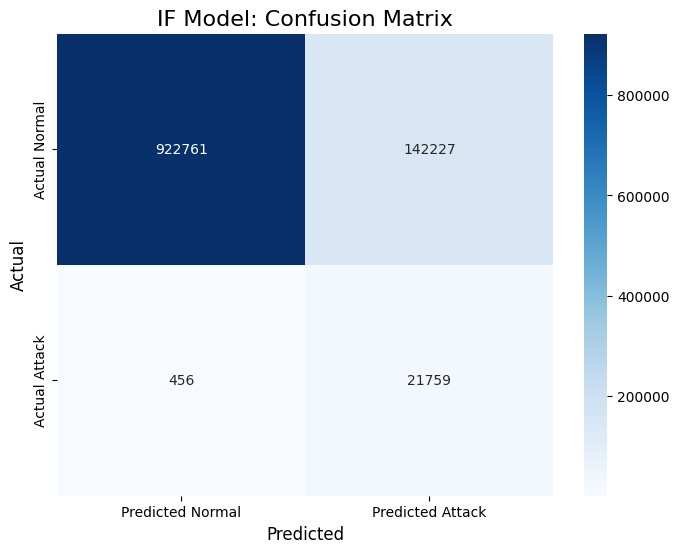


--- How to Read the IF Confusion Matrix ---
Top-Left (True Negative): 922761 -- Correctly identified normal traffic.
Bottom-Right (True Positive): 21759 -- Correctly identified attacks.
Top-Right (False Positive): 142227 -- Incorrectly flagged normal traffic as an attack.
Bottom-Left (False Negative): 456 -- Missed 456 attacks.


In [131]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


eval_df = df.loc[X.index].copy()

eval_df['predicted_label'] = np.where(eval_df['anomaly_prediction'] == -1, 1, 0)

true_labels = eval_df['label']
predicted_labels = eval_df['predicted_label']
target_names = ['Normal (Class 0)', 'Attack (Class 1)']

print("--- Classification Report ---")
report = classification_report(true_labels, predicted_labels, target_names=target_names, zero_division=0)
print(report)

print("\n--- IF Mpdel: Confusion Matrix ---")
if_cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8,6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Attack'],
            yticklabels=['Actual Normal', 'Actual Attack'])
plt.title('IF Model: Confusion Matrix', fontsize=16)
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.show()

print("\n--- How to Read the IF Confusion Matrix ---")
try:
    tn, fp, fn, tp = if_cm.ravel()
    print(f"Top-Left (True Negative): {tn} -- Correctly identified normal traffic.")
    print(f"Bottom-Right (True Positive): {tp} -- Correctly identified attacks.")
    print(f"Top-Right (False Positive): {fp} -- Incorrectly flagged normal traffic as an attack.")
    print(f"Bottom-Left (False Negative): {fn} -- Missed {fn} attacks.")
except ValueError:
    print("Could not unpack confusion matrix. Check if predictions contain both 0s and 1s.")